# Data analysis of Covid Cases in India till 25 Sep 2020

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=15,7

import cufflinks as cf           # used for smoothly working with pandas and plotly 
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium                    # helping for use maps

In [3]:
pyo.init_notebook_mode(connected=True)         #connect plotly with jupyter offline
cf.go_offline()

In [4]:
df = pd.read_csv(r'/home/rebelroar/JupyterCode/Covid-19 Data Analysis/Updated_india_covid_19_state_wise_info.csv')

In [5]:
df.drop(['sl_no'],axis=1,inplace=True)
df.rename(columns={'state_ut':'Name of State / UT','confirmed_cases':'Total Cases',
                'death_cases':'Death','recovered_cases':'Cured','active_cases':'Active Cases'},inplace=True)

In [7]:
df.head()

,Name of State / UT,Total Cases,Active Cases,Cured,Death
0,Andaman and Nicobar,3712,166,3494,52
1,Andhra Pradesh,646530,70357,570667,5506
2,Arunachal Pradesh,8133,2216,5903,14
3,Assam,163491,30182,132712,597
4,Bihar,172854,12958,159022,874


In [8]:
df['Total Cases'].sum()

5732518

In [9]:
df['Active Cases'].sum()

966382

In [10]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Cases,Active Cases,Cured,Death
0,Andaman and Nicobar,3712,166,3494,52
1,Andhra Pradesh,646530,70357,570667,5506
2,Arunachal Pradesh,8133,2216,5903,14
3,Assam,163491,30182,132712,597
4,Bihar,172854,12958,159022,874
5,Chandigarh,10726,2537,8049,140
6,Chhattisgarh,93351,35850,56773,728
7,Dadra and Nagar Haveli,2962,205,2755,2
8,Delhi,256789,30836,220866,5087
9,Goa,29879,5646,23857,376


In [11]:
Total_Active_Cases = df.groupby("Name of State / UT")['Active Cases'].sum().sort_values(ascending=False).to_frame()
# sum is just for combine both series

In [12]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,273883
Karnataka,94671
Andhra Pradesh,70357
Uttar Pradesh,61698
Tamil Nadu,46249
Kerala,42858
Chhattisgarh,35850
Odisha,34547
Delhi,30836


In [13]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,273883
Karnataka,94671
Andhra Pradesh,70357
Uttar Pradesh,61698
Tamil Nadu,46249
Kerala,42858
Chhattisgarh,35850
Odisha,34547
Delhi,30836


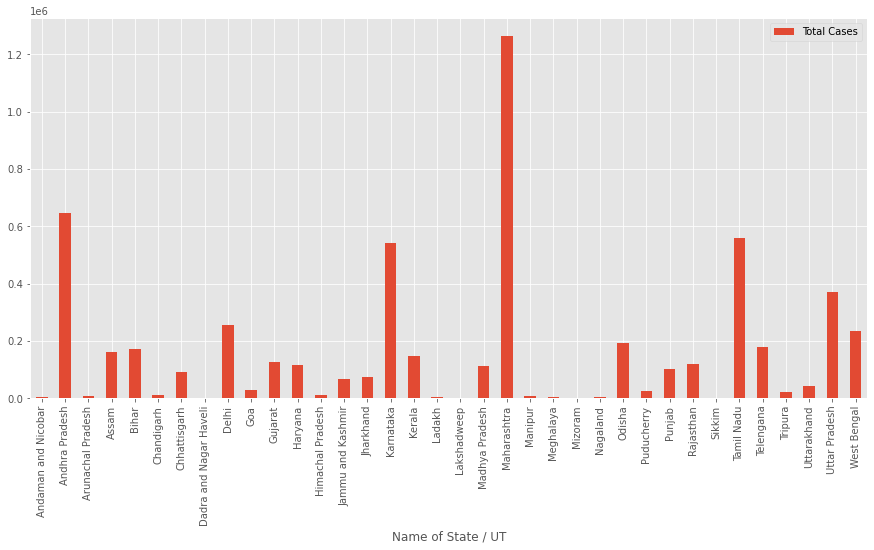

In [14]:
# pandas for visualization
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')       
plt.show()

#Plotly vis 
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')       

<BarContainer object of 36 artists>

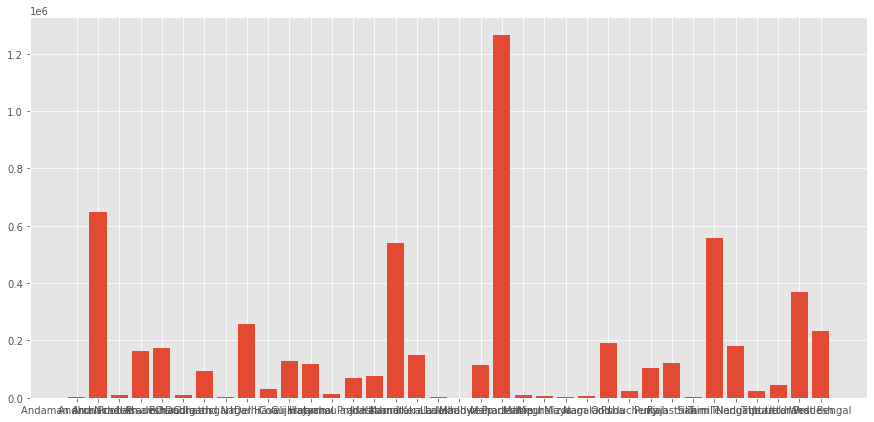

In [15]:
# matplotlib vis

plt.bar(df['Name of State / UT'],df['Total Cases'])

In [16]:
# plotly express

px.bar(df,x='Name of State / UT',y='Total Cases')

<AxesSubplot:xlabel='Name of State / UT', ylabel='Total Cases'>

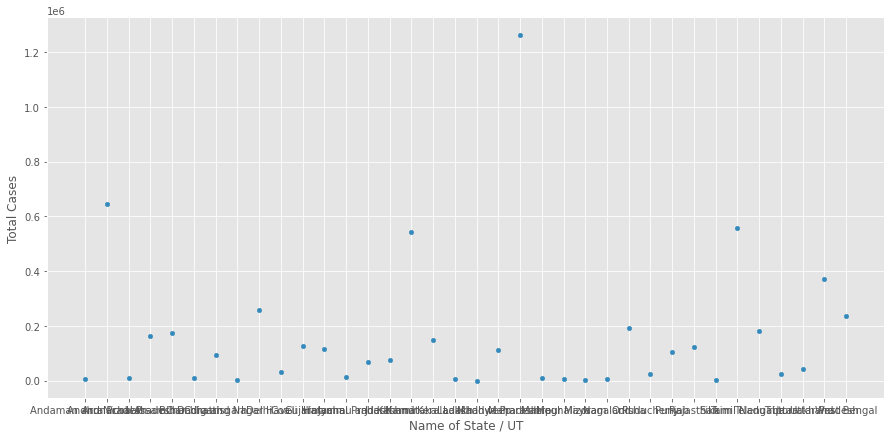

In [17]:
#pandas scatter plot

df.plot(kind='scatter',x='Name of State / UT',y='Total Cases')

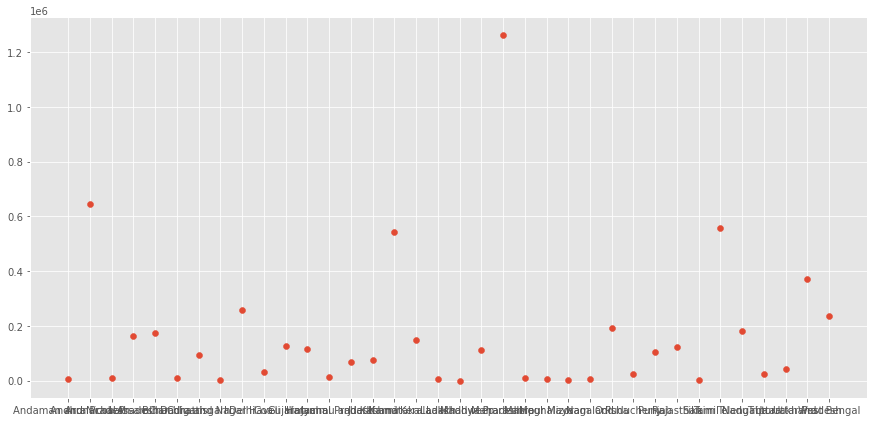

In [18]:
#matplotlib scatter plot

plt.scatter(df['Name of State / UT'],df['Total Cases'])

In [19]:
#plotly scatter plot

df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',yTitle='Total Cases',xTitle='City',mode='markers+lines',title='Ploty Scatter graph',colors='red')

In [20]:
#plotly express

px.scatter(df, x='Name of State / UT',y='Total Cases')

Object Oriented Visualization

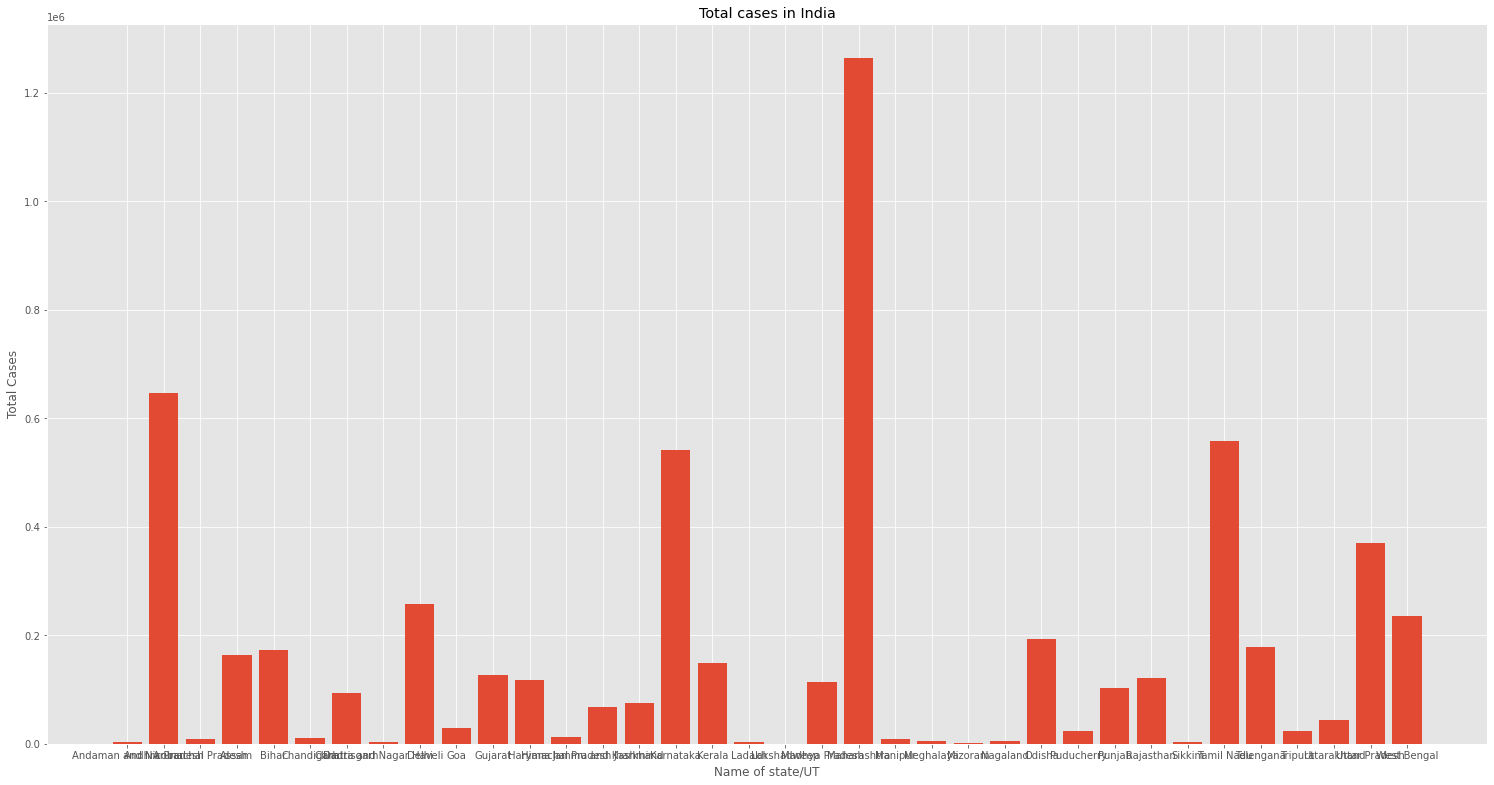

In [21]:
# Matplotlib

fig = plt.figure(figsize=(20,10))



axes = fig.add_axes([0,0,1,1],)
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total cases in India")
axes.set_xlabel("Name of state/UT")
axes.set_ylabel("Total Cases")
plt.show()

In [22]:
# Plotly graph objects

fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='Total cases in India',xaxis=dict(title='Name of state / UT'),yaxis=dict(title='total Cases'))
fig

In [23]:
Indian_cord = pd.read_excel('/home/rebelroar/JupyterCode/Covid-19 Data Analysis/Indian Coordinates.xlsx')

In [24]:
Indian_cord

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN
5,Chandigarh,30.719997,76.780006,NaN
6,Chhattisgarh,22.090420,82.159987,NaN
7,Dadra And Nagar Haveli,20.266578,73.016618,NaN
8,Delhi,28.669993,77.230004,NaN
9,Goa,15.491997,73.818001,NaN


In [26]:
df.head()

,Name of State / UT,Total Cases,Active Cases,Cured,Death
0,Andaman and Nicobar,3712,166,3494,52
1,Andhra Pradesh,646530,70357,570667,5506
2,Arunachal Pradesh,8133,2216,5903,14
3,Assam,163491,30182,132712,597
4,Bihar,172854,12958,159022,874


In [27]:
df_full = pd.merge(Indian_cord,df,on='Name of State / UT')
#df.drop(['Unnamed: 3'],axis=1,inplace=True)
df_full

,Name of State / UT,Latitude,Longitude,Unnamed: 3,Total Cases,Active Cases,Cured,Death
0,Andhra Pradesh,14.750429,78.570026,NaN,646530,70357,570667,5506
1,Delhi,28.669993,77.230004,NaN,256789,30836,220866,5087
2,Haryana,28.450006,77.019991,NaN,116856,19276,96347,1233
3,Karnataka,12.570381,76.919997,NaN,540847,94671,437910,8266
4,Kerala,8.900373,76.569993,NaN,148132,42858,104682,592
5,Maharashtra,19.250232,73.160175,NaN,1263799,273883,956030,33886
6,Punjab,31.519974,75.980003,NaN,103464,21230,79244,2990
7,Rajasthan,26.449999,74.639981,NaN,120739,18992,100365,1382
8,Telengana,18.112400,79.019300,NaN,179246,30037,148139,1070
9,Tamil Nadu,12.920386,79.150042,NaN,557999,46249,502740,9010


In [28]:
map=folium.Map(location=[20,70],zoom_start=5,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radium=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    
map